In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline


In [2]:
X=5*np.random.rand(200, 1)-3

In [3]:
#X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)


In [4]:
X.shape

(200, 1)

In [5]:
y.shape

(200, 1)

In [6]:
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

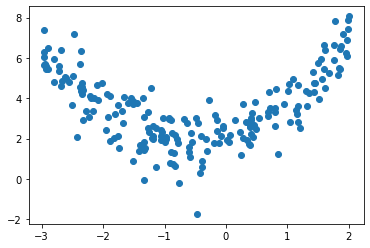

In [7]:
plt.scatter(X,y)

In [8]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
#Appliying polynomial Linear Regression
# Degree 2
polynomial=PolynomialFeatures(degree=5,include_bias=True) #include_bais, includes the intercept

In [30]:
X_train_trans=polynomial.fit_transform(X_train)
X_test_trans=polynomial.fit_transform(X_test)

In [31]:
lr=LinearRegression()

In [32]:
lr.fit(X_train_trans,y_train) # training the model

LinearRegression()

In [33]:
y_pred=lr.predict(X_train_trans)

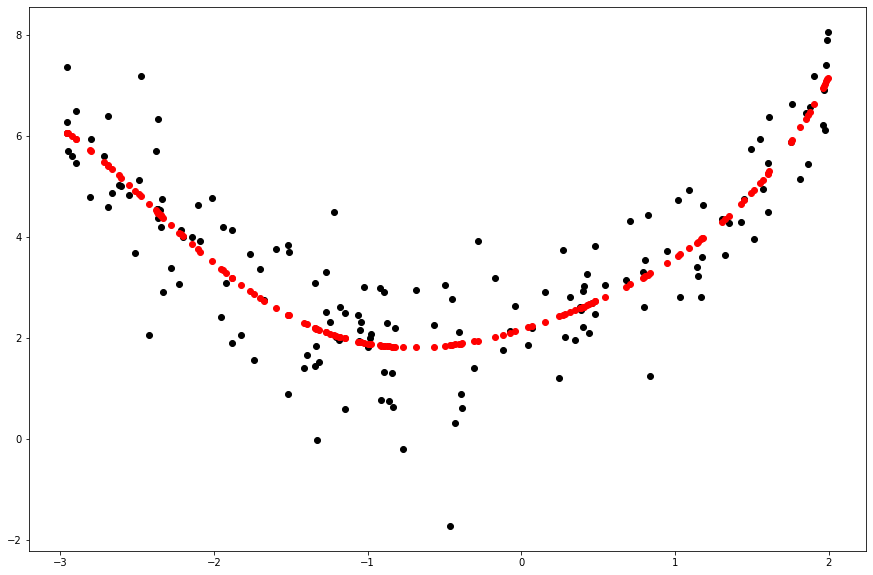

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,c="black")
plt.scatter(X_train,y_pred,c="red")

In [25]:
from sklearn.metrics import r2_score,mean_squared_error

In [26]:
print('r2 score',r2_score(y_train,y_pred))
print('MSE',np.sqrt(mean_squared_error(y_train,y_pred)))

r2 score 0.7464892301550383
MSE 0.9117280624368949


In [27]:
def polynomialRegression(X,y,k=3):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)
  
    Polynomial=PolynomialFeatures(degree=k,include_bias=True)
    X_polynomial=Polynomial.fit_transform(X_train)
    lr=LinearRegression()
    lr.fit(X_polynomial,y_train)
    X_test_polynomial=Polynomial.fit_transform(X_test)
    y_pred=lr.predict(X_test_polynomial)
    training_score=r2_score(y_train, lr.predict(X_polynomial))
    test_score=r2_score(y_test,y_pred)
    return training_score,test_score

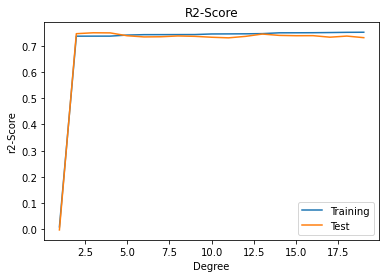

In [28]:
train=[]
test=[]
for i in range(1,20):
    r2train,r2test=polynomialRegression(X,y,k=i)
    train.append(r2train)
    test.append(r2test)
x=np.arange(19)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("r2-Score")
# plt.xlim((1, 15))
# plt.ylim((-3, 2))
plt.title("R2-Score");
plt.show()
     